<a href="https://colab.research.google.com/github/AnaghaTantry/MIT-Internship/blob/main/CountVecUSAirlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Basic Operation
import pandas as pd
import numpy as np
# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split # Split Data
from imblearn.over_sampling import SMOTE # Handling Imbalanced
# Model Building
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score # Performance Metrics
# Data Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from termcolor import cprint
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Tweets.csv')

In [ ]:
# Split text of Sentiments
positive = data[data['airline_sentiment'] == 'positive'].text
neutral  = data[data['airline_sentiment'] == 'neutral'].text
negative  = data[data['airline_sentiment'] == 'negative'].text

In [ ]:
# convert Sentiments to 0,1,2
def convert_Sentiment(sentiment):
    if  sentiment == "positive":
        return 2
    elif sentiment == "neutral":
        return 1
    elif sentiment == "negative":
        return 0

In [ ]:
# Apply convert_Sentiment function
data.airline_sentiment = data.airline_sentiment.apply(lambda x : convert_Sentiment(x))

In [ ]:
data.airline_sentiment

0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14640, dtype: int64

In [ ]:
# Remove stop words
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text

# Remove url
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# Remove punct
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)
# Remove html
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove @username
def remove_username(text):
    return re.sub('@[^\s]+','',text)

# Remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
import nltk
nltk.download('stopwords')
# Decontraction text
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)

    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text

# Seperate alphanumeric
def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def cont_rep_char(text):
    tchr = text.group(0)

    if len(tchr) > 1:
        return tchr[0:2]

def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute

# combaine negative reason with  tweet (if exsist)
data['final_text'] = data['negativereason'].fillna('') + ' ' + data['text']


# Apply functions on tweets
data['final_text'] = data['final_text'].apply(lambda x : remove_username(x))
data['final_text'] = data['final_text'].apply(lambda x : remove_url(x))
data['final_text'] = data['final_text'].apply(lambda x : remove_emoji(x))
data['final_text'] = data['final_text'].apply(lambda x : decontraction(x))
data['final_text'] = data['final_text'].apply(lambda x : seperate_alphanumeric(x))
data['final_text'] = data['final_text'].apply(lambda x : unique_char(cont_rep_char,x))
data['final_text'] = data['final_text'].apply(lambda x : char(x))
data['final_text'] = data['final_text'].apply(lambda x : x.lower())
data['final_text'] = data['final_text'].apply(lambda x : remove_stopwords(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# result
data['final_text']

0                                                     said
1                  plus added commercials experience tacky
2                   today must mean need take another trip
3        bad flight really aggressive blast obnoxious e...
4                             ca tell really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    customer service issue leaving minutes late fl...
14637            please bring american airlines blackberry
14638    customer service issue money change flight ans...
14639    ppl need know many seats next flight plz put u...
Name: final_text, Length: 14640, dtype: object

In [ ]:
X = data['final_text']
y = data['airline_sentiment']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
X_final = count_vectorizer.fit_transform(X)

In [ ]:
# Handling imbalanced using SMOTE
smote = SMOTE()
X_sm,y_sm = smote.fit_resample(X_final,y)

In [ ]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
rf = RandomForestClassifier()
skf = StratifiedKFold(n_splits=10)
y_pred = cross_val_predict(rf, X_sm, y_sm, cv=skf)
accuracy = accuracy_score(y_sm, y_pred)
f1 = f1_score(y_sm, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_sm, y_pred)
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")
class_report = classification_report(y_sm, y_pred)
print(f"Classification Report:\n{class_report}")

Accuracy: 0.8667102491465097
F1 Score: 0.8652809598430622
Confusion Matrix:
[[9135   32   11]
 [ 227 7940 1011]
 [ 143 2246 6789]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      9178
           1       0.78      0.87      0.82      9178
           2       0.87      0.74      0.80      9178

    accuracy                           0.87     27534
   macro avg       0.87      0.87      0.87     27534
weighted avg       0.87      0.87      0.87     27534



In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
skf = StratifiedKFold(n_splits=10)
y_pred = cross_val_predict(xgb, X_sm, y_sm, cv=skf)
accuracy = accuracy_score(y_sm, y_pred)
f1 = f1_score(y_sm, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_sm, y_pred)
class_report = classification_report(y_sm, y_pred)
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.9300501198518196
F1 Score: 0.9298347240637574
Confusion Matrix:
[[9173    0    5]
 [  74 8454  650]
 [  36 1161 7981]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9178
           1       0.88      0.92      0.90      9178
           2       0.92      0.87      0.90      9178

    accuracy                           0.93     27534
   macro avg       0.93      0.93      0.93     27534
weighted avg       0.93      0.93      0.93     27534



In [ ]:
gbc = GradientBoostingClassifier()
skf = StratifiedKFold(n_splits=10)
y_pred = cross_val_predict(gbc, X_sm, y_sm, cv=skf)
accuracy = accuracy_score(y_sm, y_pred)
f1 = f1_score(y_sm, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_sm, y_pred)
class_report = classification_report(y_sm, y_pred)
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.8497130820076996
F1 Score: 0.8466986108553685
Confusion Matrix:
[[9164    5    9]
 [ 146 8258  774]
 [  72 3132 5974]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9178
           1       0.72      0.90      0.80      9178
           2       0.88      0.65      0.75      9178

    accuracy                           0.85     27534
   macro avg       0.86      0.85      0.85     27534
weighted avg       0.86      0.85      0.85     27534



In [ ]:
svc = SVC()
skf = StratifiedKFold(n_splits=10)
y_pred = cross_val_predict(svc, X_sm, y_sm, cv=skf)
accuracy = accuracy_score(y_sm, y_pred)
f1 = f1_score(y_sm, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_sm, y_pred)
class_report = classification_report(y_sm, y_pred)
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.8539986925256047
F1 Score: 0.8509610892016317
Confusion Matrix:
[[9171    7    0]
 [ 375 7973  830]
 [ 298 2510 6370]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      9178
           1       0.76      0.87      0.81      9178
           2       0.88      0.69      0.78      9178

    accuracy                           0.85     27534
   macro avg       0.86      0.85      0.85     27534
weighted avg       0.86      0.85      0.85     27534



In [ ]:
mnb = MultinomialNB()
skf = StratifiedKFold(n_splits=10)
y_pred = cross_val_predict(mnb, X_sm, y_sm, cv=skf)
accuracy = accuracy_score(y_sm, y_pred)
f1 = f1_score(y_sm, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_sm, y_pred)
class_report = classification_report(y_sm, y_pred)
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.7373792402121014
F1 Score: 0.726368477628957
Confusion Matrix:
[[8884  247   47]
 [2830 4672 1676]
 [1352 1079 6747]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.97      0.80      9178
           1       0.78      0.51      0.62      9178
           2       0.80      0.74      0.76      9178

    accuracy                           0.74     27534
   macro avg       0.75      0.74      0.73     27534
weighted avg       0.75      0.74      0.73     27534



In [ ]:
dt = DecisionTreeClassifier()
skf = StratifiedKFold(n_splits=10)
y_pred = cross_val_predict(dt, X_sm, y_sm, cv=skf)
accuracy = accuracy_score(y_sm, y_pred)
f1 = f1_score(y_sm, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_sm, y_pred)
class_report = classification_report(y_sm, y_pred)
print(f"Decision Tree - Accuracy: {accuracy}")
print(f"Decision Tree - F1 Score: {f1}")
print(f"Decision Tree - Confusion Matrix:\n{conf_matrix}")
print(f"Decision Tree - Classification Report:\n{class_report}")

Decision Tree - Accuracy: 0.8622430449625917
Decision Tree - F1 Score: 0.8621987542131618
Decision Tree - Confusion Matrix:
[[8985  133   60]
 [  61 7892 1225]
 [  39 2275 6864]]
Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      9178
           1       0.77      0.86      0.81      9178
           2       0.84      0.75      0.79      9178

    accuracy                           0.86     27534
   macro avg       0.87      0.86      0.86     27534
weighted avg       0.87      0.86      0.86     27534



In [ ]:
lr = LogisticRegression(max_iter=1000)
skf = StratifiedKFold(n_splits=10)
y_pred = cross_val_predict(lr, X_sm, y_sm, cv=skf)
accuracy = accuracy_score(y_sm, y_pred)
f1 = f1_score(y_sm, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_sm, y_pred)
class_report = classification_report(y_sm, y_pred)
print(f"Logistic Regression - Accuracy: {accuracy}")
print(f"Logistic Regression - F1 Score: {f1}")
print(f"Logistic Regression - Confusion Matrix:\n{conf_matrix}")
print(f"Logistic Regression - Classification Report:\n{class_report}")

Logistic Regression - Accuracy: 0.8689256918718675
Logistic Regression - F1 Score: 0.8677951413428392
Logistic Regression - Confusion Matrix:
[[9119   44   15]
 [ 115 8125  938]
 [  69 2428 6681]]
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      9178
           1       0.77      0.89      0.82      9178
           2       0.88      0.73      0.79      9178

    accuracy                           0.87     27534
   macro avg       0.87      0.87      0.87     27534
weighted avg       0.87      0.87      0.87     27534



In [ ]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)
skf = StratifiedKFold(n_splits=10)
y_pred = cross_val_predict(bagging, X_sm, y_sm, cv=skf)
accuracy = accuracy_score(y_sm, y_pred)
f1 = f1_score(y_sm, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_sm, y_pred)
class_report = classification_report(y_sm, y_pred)
print(f"Bagging - Accuracy: {accuracy}")
print(f"Bagging - F1 Score: {f1}")
print(f"Bagging - Confusion Matrix:\n{conf_matrix}")
print(f"Bagging - Classification Report:\n{class_report}")

Bagging - Accuracy: 0.866165468148471
Bagging - F1 Score: 0.8658227648749034
Bagging - Confusion Matrix:
[[9061   71   46]
 [  81 7862 1235]
 [  48 2204 6926]]
Bagging - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9178
           1       0.78      0.86      0.81      9178
           2       0.84      0.75      0.80      9178

    accuracy                           0.87     27534
   macro avg       0.87      0.87      0.87     27534
weighted avg       0.87      0.87      0.87     27534



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)
skf = StratifiedKFold(n_splits=10)
y_pred = cross_val_predict(adaboost, X_sm, y_sm, cv=skf)
accuracy = accuracy_score(y_sm, y_pred)
f1 = f1_score(y_sm, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_sm, y_pred)
class_report = classification_report(y_sm, y_pred)
print(f"AdaBoost - Accuracy: {accuracy}")
print(f"AdaBoost - F1 Score: {f1}")
print(f"AdaBoost - Confusion Matrix:\n{conf_matrix}")
print(f"AdaBoost - Classification Report:\n{class_report}")

AdaBoost - Accuracy: 0.8614440328321348
AdaBoost - F1 Score: 0.8608368369892978
AdaBoost - Confusion Matrix:
[[9008  122   48]
 [  77 8092 1009]
 [  46 2513 6619]]
AdaBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      9178
           1       0.75      0.88      0.81      9178
           2       0.86      0.72      0.79      9178

    accuracy                           0.86     27534
   macro avg       0.87      0.86      0.86     27534
weighted avg       0.87      0.86      0.86     27534



In [ ]:
from sklearn.linear_model import SGDClassifier
# Initialize Stochastic Gradient Descent classifier
sgd = SGDClassifier()
# Use StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=10)
# Perform cross-validation predictions
y_pred = cross_val_predict(sgd, X_sm, y_sm, cv=skf)
# Calculate performance metrics
accuracy = accuracy_score(y_sm, y_pred)
f1 = f1_score(y_sm, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_sm, y_pred)
class_report = classification_report(y_sm, y_pred)
# Print the performance metrics and confusion matrix
print(f"SGDClassifier - Accuracy: {accuracy}")
print(f"SGDClassifier - F1 Score: {f1}")
print(f"SGDClassifier - Confusion Matrix:\n{conf_matrix}")
print(f"SGDClassifier - Classification Report:\n{class_report}")

SGDClassifier - Accuracy: 0.8634778818914797
SGDClassifier - F1 Score: 0.8618230164721595
SGDClassifier - Confusion Matrix:
[[9148   13   17]
 [ 112 8171  895]
 [  68 2654 6456]]
SGDClassifier - Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9178
           1       0.75      0.89      0.82      9178
           2       0.88      0.70      0.78      9178

    accuracy                           0.86     27534
   macro avg       0.87      0.86      0.86     27534
weighted avg       0.87      0.86      0.86     27534



In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Assuming X_sm and y_sm are defined
# Define the individual classifiers
lr = LogisticRegression()
dt = DecisionTreeClassifier()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, stratify=y_sm, random_state=42)

# Initialize VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('lg', lr),
    ('svm', dt)
], voting='hard')

# Fit the VotingClassifier on the training data
voting_clf.fit(X_train, y_train)

# Make predictions on the test data
voting_predictions = voting_clf.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, voting_predictions)
f1 = f1_score(y_test, voting_predictions, average='weighted')
conf_matrix = confusion_matrix(y_test, voting_predictions)
class_report = classification_report(y_test, voting_predictions)

# Print the performance metrics and confusion matrix
print(f"VotingClassifier (LogisticRegression + DecisionTree) - Accuracy: {accuracy}")
print(f"VotingClassifier (LogisticRegression + DecisionTree) - F1 Score: {f1}")
print(f"VotingClassifier (LogisticRegression + DecisionTree) - Confusion Matrix:\n{conf_matrix}")
print(f"VotingClassifier (LogisticRegression + DecisionTree) - Classification Report:\n{class_report}")


VotingClassifier (LogisticRegression + DecisionTree) - Accuracy: 0.8703468313056111
VotingClassifier (LogisticRegression + DecisionTree) - F1 Score: 0.8683741176426751
VotingClassifier (LogisticRegression + DecisionTree) - Confusion Matrix:
[[1833    2    0]
 [  20 1669  147]
 [  20  525 1291]]
VotingClassifier (LogisticRegression + DecisionTree) - Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1835
           1       0.76      0.91      0.83      1836
           2       0.90      0.70      0.79      1836

    accuracy                           0.87      5507
   macro avg       0.88      0.87      0.87      5507
weighted avg       0.88      0.87      0.87      5507



In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Assuming X_sm and y_sm are defined
# Define the individual classifiers
lr = LogisticRegression()
svm = SVC()
dt = DecisionTreeClassifier()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, stratify=y_sm, random_state=42)

# Initialize VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('lr', lr),
    ('svm', svm),
    ('ds', dt)
], voting='hard')

# Fit the VotingClassifier on the training data
voting_clf.fit(X_train, y_train)

# Make predictions on the test data
voting_predictions = voting_clf.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, voting_predictions)
f1 = f1_score(y_test, voting_predictions, average='weighted')
conf_matrix = confusion_matrix(y_test, voting_predictions)
class_report = classification_report(y_test, voting_predictions)

# Print the performance metrics and confusion matrix
print(f"VotingClassifier (LogisticRegression + SVM + DecisionTree) - Accuracy: {accuracy}")
print(f"VotingClassifier (LogisticRegression + SVM + DecisionTree) - F1 Score: {f1}")
print(f"VotingClassifier (LogisticRegression + SVM + DecisionTree) - Confusion Matrix:\n{conf_matrix}")
print(f"VotingClassifier (LogisticRegression + SVM + DecisionTree) - Classification Report:\n{class_report}")


VotingClassifier (LogisticRegression + SVM + DecisionTree) - Accuracy: 0.8737969856546214
VotingClassifier (LogisticRegression + SVM + DecisionTree) - F1 Score: 0.8720692993098346
VotingClassifier (LogisticRegression + SVM + DecisionTree) - Confusion Matrix:
[[1833    1    1]
 [  19 1648  169]
 [  31  474 1331]]
VotingClassifier (LogisticRegression + SVM + DecisionTree) - Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1835
           1       0.78      0.90      0.83      1836
           2       0.89      0.72      0.80      1836

    accuracy                           0.87      5507
   macro avg       0.88      0.87      0.87      5507
weighted avg       0.88      0.87      0.87      5507



In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
voting_clf = VotingClassifier(estimators=[
    ('sgd', sgd),
    ('log_reg', lr)
], voting='hard')
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"VotingClassifier (SGD + LogisticRegression) - Accuracy: {accuracy}")
print(f"VotingClassifier (SGD + LogisticRegression) - F1 Score: {f1}")
print(f"VotingClassifier (SGD + LogisticRegression) - Confusion Matrix:\n{conf_matrix}")
print(f"VotingClassifier (SGD + LogisticRegression) - Classification Report:\n{class_report}")

VotingClassifier (SGD + LogisticRegression) - Accuracy: 0.8701652442346105
VotingClassifier (SGD + LogisticRegression) - F1 Score: 0.8681026492550871
VotingClassifier (SGD + LogisticRegression) - Confusion Matrix:
[[1830    2    3]
 [  19 1679  138]
 [  20  533 1283]]
VotingClassifier (SGD + LogisticRegression) - Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1835
           1       0.76      0.91      0.83      1836
           2       0.90      0.70      0.79      1836

    accuracy                           0.87      5507
   macro avg       0.88      0.87      0.87      5507
weighted avg       0.88      0.87      0.87      5507



Random Forest - Accuracy: 0.8662744243480788
Random Forest - F1 Score: 0.8648531417694043
XGB - Accuracy: 0.9300501198518196
XGB - F1 Score: 0.9298347240637574
Gradient Boosting - Accuracy: 0.8497130820076996
Gradient Boosting - F1 Score: 0.8466393512018124
SVC - Accuracy: 0.8539986925256047
SVC - F1 Score: 0.8509610892016317
Multinomial NB - Accuracy: 0.7373792402121014
Multinomial NB - F1 Score: 0.726368477628957
Decision Tree - Accuracy: 0.8628604634270357
Decision Tree - F1 Score: 0.8628061142209237
Logistic Regression - Accuracy: 0.8689256918718675
Logistic Regression - F1 Score: 0.8677951413428392
Bagging - Accuracy: 0.8661291494152684
Bagging - F1 Score: 0.8658210581064268
AdaBoost - Accuracy: 0.86151667029854
AdaBoost - F1 Score: 0.8609244515134504
SGD - Accuracy: 0.8632599694922641
SGD - F1 Score: 0.8615884415014999
Voting (LR + DT) - Accuracy: 0.8693615166702986
Voting (LR + DT) - F1 Score: 0.8675827616318715
Voting (LR + SVM + DT) - Accuracy: 0.8689620106050701
Voting (LR + 

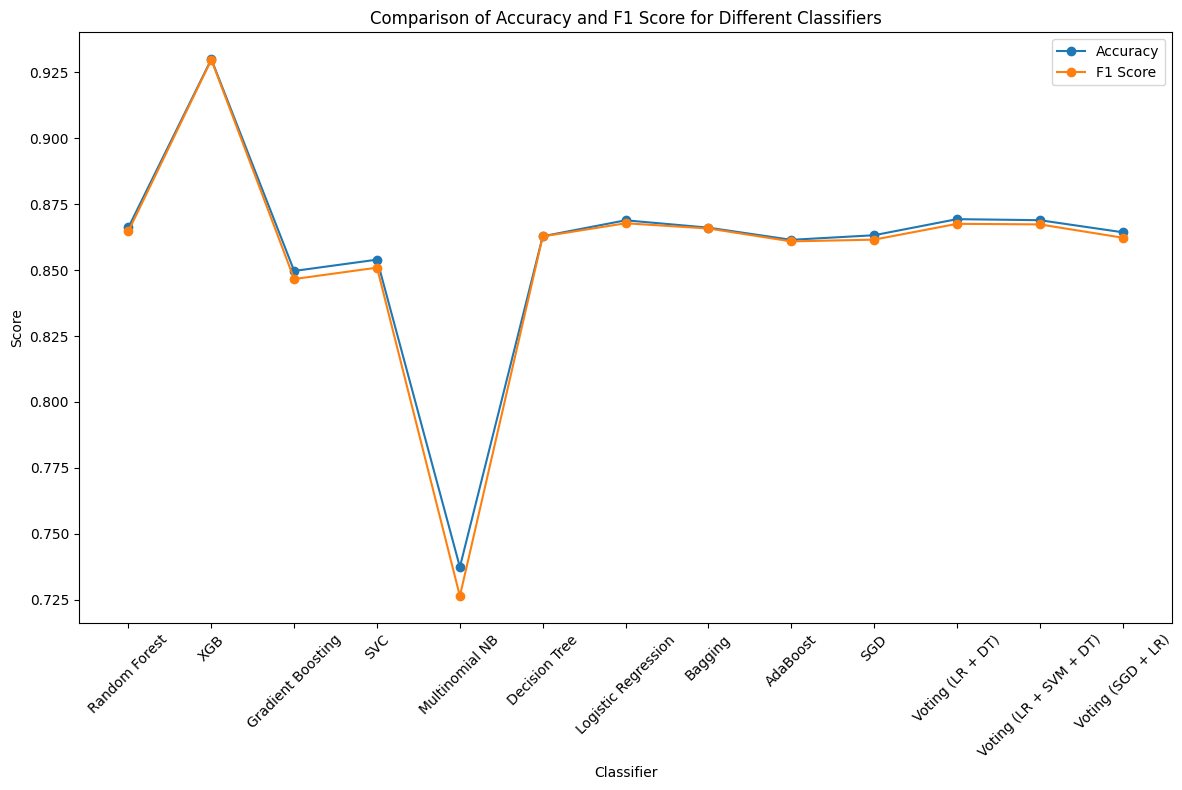

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier

# Lists to store the accuracy and F1 scores
accuracy_list = []
f1_score_list = []
classifiers = [
    ('Random Forest', RandomForestClassifier()),
    ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('SVC', SVC()),
    ('Multinomial NB', MultinomialNB()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Bagging', BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)),
    ('AdaBoost', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)),
    ('SGD', SGDClassifier()),
    ('Voting (LR + DT)', VotingClassifier(estimators=[
        ('lg', LogisticRegression()),
        ('dt', DecisionTreeClassifier())], voting='hard')),
    ('Voting (LR + SVM + DT)', VotingClassifier(estimators=[
        ('lr', LogisticRegression()),
        ('svm', SVC()),
        ('ds', DecisionTreeClassifier())], voting='hard')),
    ('Voting (SGD + LR)', VotingClassifier(estimators=[
        ('sgd', SGDClassifier()),
        ('log_reg', LogisticRegression())], voting='hard'))
]

# Assuming X_sm and y_sm are defined
for name, clf in classifiers:
    skf = StratifiedKFold(n_splits=10)
    y_pred = cross_val_predict(clf, X_sm, y_sm, cv=skf)
    accuracy = accuracy_score(y_sm, y_pred)
    f1 = f1_score(y_sm, y_pred, average='weighted')
    accuracy_list.append(accuracy)
    f1_score_list.append(f1)
    print(f"{name} - Accuracy: {accuracy}")
    print(f"{name} - F1 Score: {f1}")

# Plotting the comparison graph
x_labels = [name for name, _ in classifiers]

plt.figure(figsize=(12, 8))
plt.plot(x_labels, accuracy_list, marker='o', label='Accuracy')
plt.plot(x_labels, f1_score_list, marker='o', label='F1 Score')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.title('Comparison of Accuracy and F1 Score for Different Classifiers')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


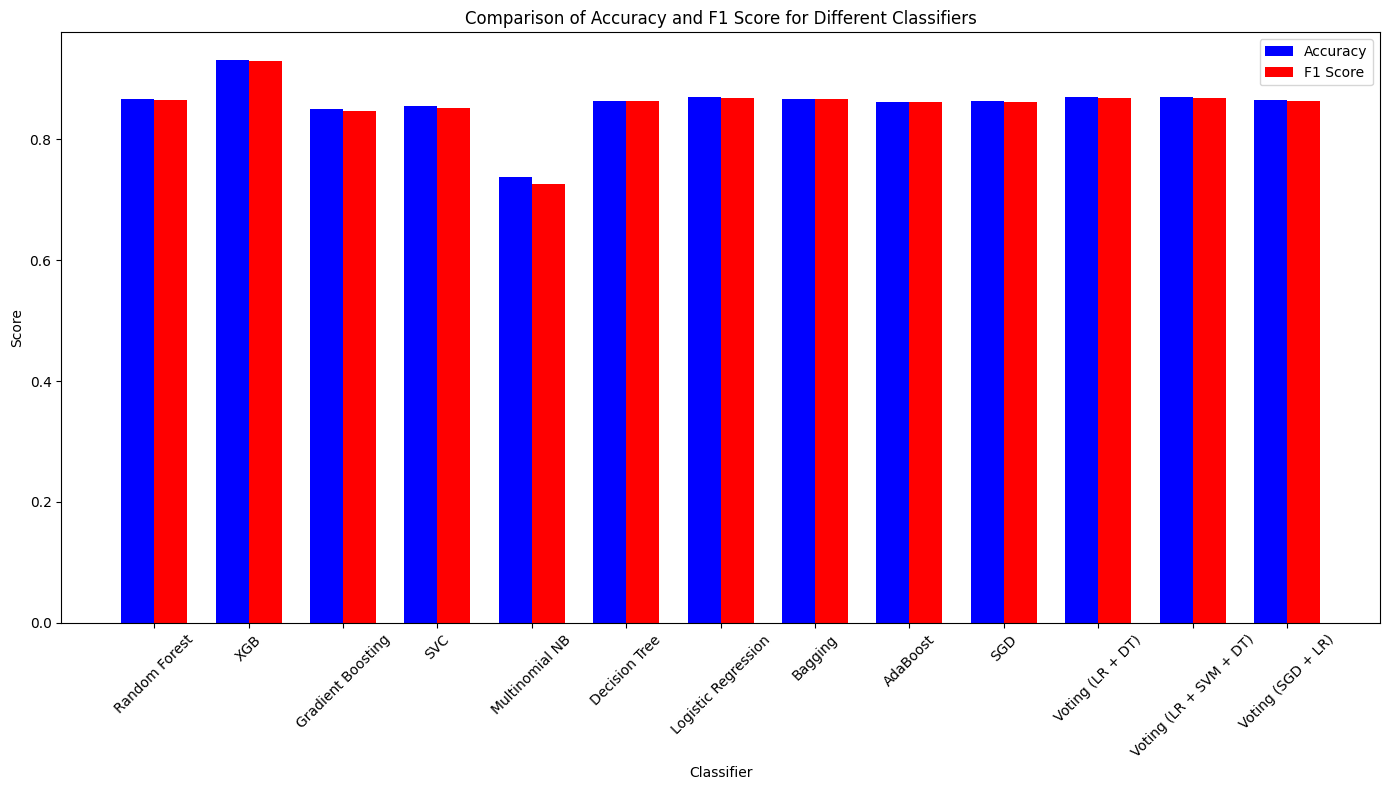

In [ ]:
x_labels = [name for name, _ in classifiers]

plt.figure(figsize=(14, 8))
bar_width = 0.35
index = range(len(classifiers))

# Plot bars for Accuracy and F1 Score
plt.bar(index, accuracy_list, bar_width, label='Accuracy', color='blue')
plt.bar([i + bar_width for i in index], f1_score_list, bar_width, label='F1 Score', color='r')

plt.xlabel('Classifier')
plt.ylabel('Score')
plt.title('Comparison of Accuracy and F1 Score for Different Classifiers')
plt.xticks([i + bar_width/2 for i in index], x_labels, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()